<font color = green >

# Cover_Types Classification

</font>



<font color = green >

### import libs

</font>

In [9]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingCVClassifier


<font color = green >

### Load data

</font>

In [10]:
def load_data():
    train = pd.read_csv('data/train.csv')
    kaggle_test = pd.read_csv('data/test.csv')
    y_train, x_train = train['Cover_Type'], train.drop(['Cover_Type'], axis=1)
    kaggle_test_ids = kaggle_test['Id']
    return x_train, y_train, kaggle_test, kaggle_test_id

x_train, y_train, kaggle_test, kaggle_test_ids = load_data()
        
print("train data shape:", np.shape(x_train))
print("test data shape:", np.shape(kaggle_test))

x_train.describe()


train data shape: (15120, 55)
test data shape: (565892, 55)


Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  ...   Soil_Type31   Soil_Type32   Soil_Type33  \
count   15120.000000  ...  15120.000000  15120.000000  15120.000000   
mean      135.091997  ...      0.021958      0.045635      0.040741   
std        45.895189  ...      0.146550      0.208699      0.197696   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%       106.000000  ...      0.000000      0.000000      0.000000   
50%       138.000000  ...      0.000000      0.000000      0.000000   
75%       167.000000  ...      0.000000      0.000000      0.000000   
max       248.000000  ...      1.000000      1.000000      1.000000   

        Soil_Type34   Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.001455      0.006746      0.000661      0.002249      0.048148   
std        0.038118      0.081859      0.025710      0.047368      0.214086   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type39   Soil_Type40  
count  15120.000000  15120.000000  
mean       0.043452      0.030357  
std        0.203880      0.171574  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 55 columns]

<font color = green >

### Add new features

</font>

In [11]:

# Stoneyness per each Soil_Type class 
stoneyness = [4, 3, 1, 1, 1, 2, 0, 0, 3, 1, 1, 2, 1, 0, 0, 0, 0, 3, 0, 0,
              0, 4, 0, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4]

def create_new_features(data: pd.DataFrame):
    
    # Distance difference
    data['Hydro_Elevation_diff'] = data['Elevation'] - data['Vertical_Distance_To_Hydrology']
    data['Hydro_Fire_diff'] = abs(data['Horizontal_Distance_To_Hydrology'] - data['Horizontal_Distance_To_Fire_Points'])
    data['Hydro_Road_diff'] = abs(data['Horizontal_Distance_To_Hydrology'] - data['Horizontal_Distance_To_Roadways'])
    data['Road_Fire_diff'] = abs(data['Horizontal_Distance_To_Roadways'] - data['Horizontal_Distance_To_Fire_Points'])

    # Distance sum    
    data['Hydro_Fire_sum'] = data['Horizontal_Distance_To_Hydrology'] + data['Horizontal_Distance_To_Fire_Points']
    data['Hydro_Road_sum'] = data['Horizontal_Distance_To_Hydrology'] + data['Horizontal_Distance_To_Roadways']
    data['Road_Fire_sum'] = data['Horizontal_Distance_To_Roadways'] + data['Horizontal_Distance_To_Fire_Points']
    
    # Euclidean distance
    data['Hydro_Euclidean'] = (data['Horizontal_Distance_To_Hydrology'] ** 2 + data['Vertical_Distance_To_Hydrology'] ** 2) ** 0.5

    # Classification by Soil_Type stoneyness 
    data['Stoneyness'] = sum(i * data['Soil_Type{}'.format(i)] for i in range(1, 41))
    data['Stoneyness'] = data['Stoneyness'].replace(range(1, 41), stoneyness)
    return data
    
x_train = create_new_features(x_train)
kaggle_test = create_new_features(kaggle_test)


<font color = green >

### Add GaussianMixtureModel prediction as a feature


</font>

Since the test dataset is so large will be good to extract features from it. GaussianMixture clustering model built against the Test data and then added back to both Train/Test as a new feature.



In [12]:
from sklearn.mixture import GaussianMixture


def gmm(x_train: pd.DataFrame, kaggle_test: pd.DataFrame):
    gmix = GaussianMixture(n_components=10, verbose=1)
    gmix.fit(kaggle_test)
    
    x_train['Test_Cluster'] = gmix.predict(x_train)
    kaggle_test['Test_Cluster'] = gmix.predict(kaggle_test)
    
    return x_train, kaggle_test

x_train, kaggle_test = gmm(x_train, kaggle_test)

Initialization 0
  Iteration 10
Initialization converged: True


<font color = green >

### Get count of each Soil_Type from the total
</font>

In [17]:

x_train_ct = []
kaggle_test_ct = []
for i in range(1, 41):
    x_train_ct.append(sum(x_train[f'Soil_Type{i}']))
    kaggle_test_ct.append(sum(kaggle_test[f'Soil_Type{i}']))

x_train_ct = np.array(x_train_ct) / sum(x_train_ct) * 100
kaggle_test_ct = np.array(kaggle_test_ct) / sum(kaggle_test_ct) * 100


<font color = green >

### Plot x_train and kaggle_test Soil_Types count from the total
</font>

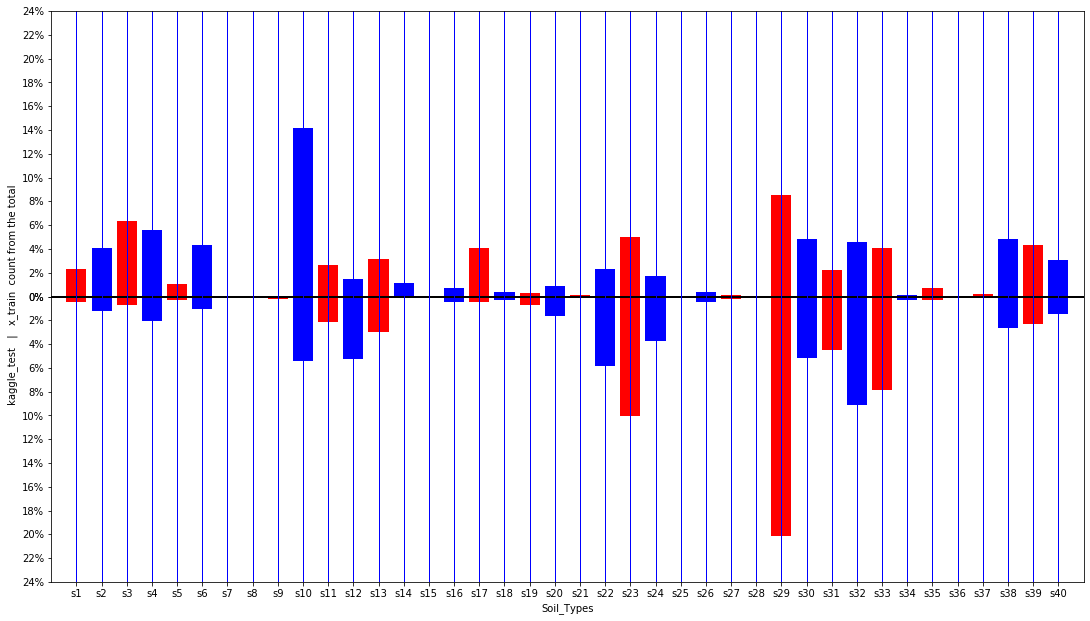

In [23]:
import matplotlib as plt

fig = plot.gcf()
fig.set_size_inches(18.5, 10.5)

plot.axis([0, 41, -max(kaggle_test_ct) + 5, max(x_train_ct) + 5])
colors = ['r', 'b']

for i in range(40):
    plot.bar(i + 1, height=[-kaggle_test_ct[i], x_train_ct[i]], color=colors[i % 2])
    
plot.xlabel('Soil_Types')
plot.ylabel(' kaggle_test   |   x_train  count from the total')
plot.xticks([i for i in range(1, 41)], [f"s{i}" for i in range(1, 41)])

y_ticks = []
y_labels = []
for i in range(0, 26, 2):
    y_ticks += [i, -i]
    y_labels += [f"{i}%", f"{i}%"]

plot.yticks(y_ticks, y_labels)
plot.axhline(color='black', linewidth=2)

for i in range(1, 41):
    plot.axvline(i, color='b', linewidth=1)

<font color = green >

### Drop features
</font>

In [24]:
zero_important_features = ['Id', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
                           'Soil_Type18', 'Soil_Type19', 'Soil_Type21', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
                           'Soil_Type28', 'Soil_Type34', 'Soil_Type36', 'Soil_Type37']

x_train = x_train.drop(zero_important_features, axis=1)
kaggle_test = kaggle_test.drop(zero_important_features, axis=1)

<font color = green >

### Data scaling
</font>

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
kaggle_test = scaler.transform(kaggle_test)

<font color = green >

### Create classifiers
</font>

In [28]:
random_s = 42

ab_clf = AdaBoostClassifier(n_estimators=300,
                            base_estimator=DecisionTreeClassifier(min_samples_leaf=2, random_state=random_s),
                            random_state=random_s)

gb_clf = GradientBoostingClassifier(n_estimators=300, max_features=0.3, max_depth=14, min_samples_split=2,
                                    min_samples_leaf=2, random_state=random_s)

rf_clf = RandomForestClassifier(n_estimators=300, max_features=0.3, max_depth=14, min_samples_split=2,
                                min_samples_leaf=2, random_state=random_s)


<font color = green >

### Create StackingCVClassifier
</font>

In [29]:
stack = StackingCVClassifier(classifiers=[ab_clf, gb_clf, rf_clf], meta_classifier=gb_clf, cv=5,
                             use_probas=True, use_features_in_secondary=True, verbose=1,
                             random_state=random_s)

<font color = green >

### Make predictions
</font>

In [ ]:

# Fitting model
stack.fit(x_train, y_train)

# Making predictions
y_pred = stack.predict(self.kaggle_test)

# Creating submission
pd.DataFrame(data={'Id': kaggle_test_ids, 'Cover_Type': y_pred}).to_csv('submission.csv', index=False)

Fitting 3 classifiers...
Fitting classifier1: adaboostclassifier (1/3)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: gradientboostingclassifier (2/3)
